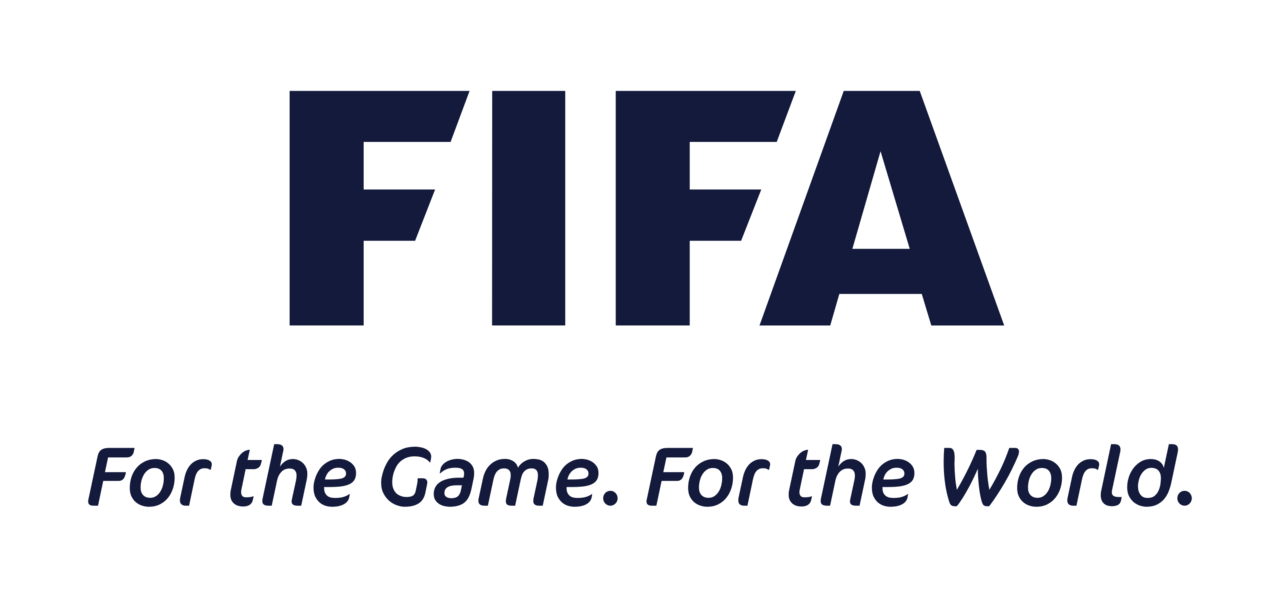



## **INTRODUCTION**
Greetings! In this project, we're leveraging FIFA's player data to forecast player ratings from their profiles. We kicked things off by importing necessary libraries, addressing missing values, and extracting insights about players. Moving forward, we focused on constructing models to accurately predict overall player ratings. Let's delve into the processes!

FIFA
*for the game, for the world  *


**Step 1: DATA COLLECTION**

In [ ]:
#Importation of neccessary libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold



from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1= pd.read_csv("/content/players_21 copy.csv")


In [ ]:
df2= pd.read_csv("/content/players_22 copy.csv")

<ipython-input-8-6014406191de>:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df2= pd.read_csv("/content/players_22 copy.csv")


In [ ]:
df1.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     188545  https://sofifa.com/player/188545/robert-lewand...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
2     R. Lewandowski                   Robert Lewandowski               ST   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De Bruyne          CAM, CM   

   overall  potential    value_eur  wage_eur  age  ...   lcb    cb   rcb  \
0       93         93  103500000.0  560000.0   33  ...  52+3  52+3  52+3   
1       92         92   63000000.0  220000.0   35  ...  54+3  54+3  54+3   
2       91         91  111000000.0  240000.0   31  ...  60+3  60+3  60+3   
3       91         91  132000000.0  270000.0   28  ...  49+3  49+3  49+3   
4       91         91  129000000.0  370000.0   29  ...  69+3  69+3  69+3   

     rb    gk                                    player_face_url  \
0  62+3  19+3  https://cdn.sofifa.net/players/158/023/21_120.png   
1  61+3  20+3  https://cdn.sofifa.net/players/020/801/21_120.png   
2  61+3  19+3  https://cdn.sofifa.net/players/188/545/21_120.png   
3  62+3  20+3  https://cdn.sofifa.net/players/190/871/21_120.png   
4  75+3  21+3  https://cdn.sofifa.net/players/192/985/21_120.png   

                             club_logo_url  \
0  https://cdn.sofifa.net/teams/241/60.png   
1   https://cdn.sofifa.net/teams/45/60.png   
2   https://cdn.sofifa.net/teams/21/60.png   
3   https://cdn.sofifa.net/teams/73/60.png   
4   https://cdn.sofifa.net/teams/10/60.png   

                             club_flag_url  \
0      https://cdn.sofifa.net/flags/es.png   
1      https://cdn.sofifa.net/flags/it.png   
2      https://cdn.sofifa.net/flags/de.png   
3      https://cdn.sofifa.net/flags/fr.png   
4  https://cdn.sofifa.net/flags/gb-eng.png   

                            nation_logo_url  \
0  https://cdn.sofifa.net/teams/1369/60.png   
1  https://cdn.sofifa.net/teams/1354/60.png   
2                                       NaN   
3                                       NaN   
4  https://cdn.sofifa.net/teams/1325/60.png   

                       nation_flag_url  
0  https://cdn.sofifa.net/flags/ar.png  
1  https://cdn.sofifa.net/flags/pt.png  
2  https://cdn.sofifa.net/flags/pl.png  
3  https://cdn.sofifa.net/flags/br.png  
4  https://cdn.sofifa.net/flags/be.png  

[5 rows x 110 columns]

In [ ]:
df2.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De Bruyne          CM, CAM   

   overall  potential    value_eur  wage_eur  age  ...   lcb    cb   rcb  \
0       93         93   78000000.0  320000.0   34  ...  50+3  50+3  50+3   
1       92         92  119500000.0  270000.0   32  ...  60+3  60+3  60+3   
2       91         91   45000000.0  270000.0   36  ...  53+3  53+3  53+3   
3       91         91  129000000.0  270000.0   29  ...  50+3  50+3  50+3   
4       91         91  125500000.0  350000.0   30  ...  69+3  69+3  69+3   

     rb    gk                                    player_face_url  \
0  61+3  19+3  https://cdn.sofifa.net/players/158/023/22_120.png   
1  61+3  19+3  https://cdn.sofifa.net/players/188/545/22_120.png   
2  60+3  20+3  https://cdn.sofifa.net/players/020/801/22_120.png   
3  62+3  20+3  https://cdn.sofifa.net/players/190/871/22_120.png   
4  75+3  21+3  https://cdn.sofifa.net/players/192/985/22_120.png   

                            club_logo_url  \
0  https://cdn.sofifa.net/teams/73/60.png   
1  https://cdn.sofifa.net/teams/21/60.png   
2  https://cdn.sofifa.net/teams/11/60.png   
3  https://cdn.sofifa.net/teams/73/60.png   
4  https://cdn.sofifa.net/teams/10/60.png   

                             club_flag_url  \
0      https://cdn.sofifa.net/flags/fr.png   
1      https://cdn.sofifa.net/flags/de.png   
2  https://cdn.sofifa.net/flags/gb-eng.png   
3      https://cdn.sofifa.net/flags/fr.png   
4  https://cdn.sofifa.net/flags/gb-eng.png   

                            nation_logo_url  \
0  https://cdn.sofifa.net/teams/1369/60.png   
1  https://cdn.sofifa.net/teams/1353/60.png   
2  https://cdn.sofifa.net/teams/1354/60.png   
3                                       NaN   
4  https://cdn.sofifa.net/teams/1325/60.png   

                       nation_flag_url  
0  https://cdn.sofifa.net/flags/ar.png  
1  https://cdn.sofifa.net/flags/pl.png  
2  https://cdn.sofifa.net/flags/pt.png  
3  https://cdn.sofifa.net/flags/br.png  
4  https://cdn.sofifa.net/flags/be.png  

[5 rows x 110 columns]

**Step 2: DATA PRE-PROCESSING**

For both datasets, we checked for the columns with missing null values
and dropped the ones that had over 30% missing values.Removing such columns aids
in elevating data quality and precision, thereby mitigating the potential
introduction of biases.
We also removed all columns containing URLs and other  columns we saw to be irrlevant to our model as they are also not useful to the analysis.


In [ ]:
df1.isnull().sum()

sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url         225
club_flag_url         225
nation_logo_url     17817
nation_flag_url         0
Length: 110, dtype: int64

In [ ]:
df2.isnull().sum()

sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url          61
club_flag_url          61
nation_logo_url     18480
nation_flag_url         0
Length: 110, dtype: int64

In [ ]:
#For df1
# Used to obtain the percentage of missing values for each column
missing_percentage = (df1.isna().mean() * 100)

# Identify columns with more than 30% missing values
cols_to_drop = missing_percentage[missing_percentage > 30].index.tolist()

# Drop the identified columns and columns containing URLs
df1.drop(cols_to_drop +
         ["club_flag_url",
         "nation_logo_url",
         "nation_flag_url",
         "player_url",
         "club_logo_url",
         "player_face_url",
          "short_name",
          "long_name",
          'sofifa_id'],
         inplace=True,axis=1)

# Print the columns and their missing percentages
for col in cols_to_drop:
    print(f'{col} - {round(missing_percentage[col])}%')

club_loaned_from - 96%
nation_team_id - 94%
nation_position - 94%
nation_jersey_number - 94%
player_tags - 93%
player_traits - 56%
goalkeeping_speed - 89%
nation_logo_url - 94%


In [ ]:
#For df2
# Used to obtain the percentage of missing values for each column
missing_percentage = (df2.isna().mean() * 100)

# Identify columns with more than 30% missing values
cols_to_drop = missing_percentage[missing_percentage > 30].index.tolist()

# Drop the identified columns and columns containing URLs
df2.drop(cols_to_drop +
         ["club_flag_url",
         "nation_logo_url",
         "nation_flag_url",
         "player_url",
         "player_face_url",
         'club_logo_url',
         "short_name",
          "long_name",
          "sofifa_id"],
         inplace=True,axis=1)

# Print the columns and their missing percentages
for col in cols_to_drop:
    print(f'{col} - {round(missing_percentage[col])}%')

club_loaned_from - 94%
nation_team_id - 96%
nation_position - 96%
nation_jersey_number - 96%
player_tags - 93%
player_traits - 51%
goalkeeping_speed - 89%
nation_logo_url - 96%


In [ ]:
#To get basic summary statistics of datasets
df1.describe()

overall     potential     value_eur       wage_eur           age  \
count  18944.000000  18944.000000  1.870700e+04   18719.000000  18944.000000   
mean      65.677787     71.086729  2.902288e+06    9148.482825     25.225823   
std        7.002278      6.109985  7.743775e+06   19893.149956      4.697354   
min       47.000000     47.000000  9.000000e+03     500.000000     16.000000   
25%       61.000000     67.000000  4.750000e+05    1000.000000     21.000000   
50%       66.000000     71.000000  9.750000e+05    3000.000000     25.000000   
75%       70.000000     75.000000  2.000000e+06    8000.000000     29.000000   
max       93.000000     95.000000  1.855000e+08  560000.000000     53.000000   

          height_cm     weight_kg   club_team_id  league_level  \
count  18944.000000  18944.000000   18719.000000  18719.000000   
mean     181.190773     75.016892   47908.905551      1.355468   
std        6.825672      7.057140   53906.733776      0.739015   
min      155.000000     50.000000       1.000000      1.000000   
25%      176.000000     70.000000     461.000000      1.000000   
50%      181.000000     75.000000    1913.000000      1.000000   
75%      186.000000     80.000000  110986.000000      1.000000   
max      206.000000    110.000000  114899.000000      4.000000   

       club_jersey_number  ...  mentality_penalties  mentality_composure  \
count        18719.000000  ...         18944.000000         18944.000000   
mean            20.589668  ...            48.050412            57.978674   
std             17.057568  ...            15.671721            12.118390   
min              1.000000  ...             6.000000            12.000000   
25%              9.000000  ...            38.750000            50.000000   
50%             18.000000  ...            49.000000            59.000000   
75%             27.000000  ...            60.000000            66.000000   
max             99.000000  ...            92.000000            96.000000   

       defending_marking_awareness  defending_standing_tackle  \
count                 18944.000000               18944.000000   
mean                     46.470017                  47.581767   
std                      20.169591                  21.402461   
min                       3.000000                   5.000000   
25%                      29.000000                  27.000000   
50%                      52.000000                  55.000000   
75%                      63.000000                  65.000000   
max                      94.000000                  93.000000   

       defending_sliding_tackle  goalkeeping_diving  goalkeeping_handling  \
count              18944.000000        18944.000000          18944.000000   
mean                  45.546505           16.446052             16.236486   
std                   20.953997           17.577332             16.845480   
min                    4.000000            1.000000              1.000000   
25%                   24.000000            8.000000              8.000000   
50%                   52.000000           11.000000             11.000000   
75%                   63.000000           14.000000             14.000000   
max                   90.000000           90.000000             92.000000   

       goalkeeping_kicking  goalkeeping_positioning  goalkeeping_reflexes  
count         18944.000000             18944.000000          18944.000000  
mean             16.103357                16.225982             16.551309  
std              16.519399                17.017341             17.878121  
min               1.000000                 1.000000              1.000000  
25%               8.000000                 8.000000              8.000000  
50%              11.000000                11.000000             11.000000  
75%              14.000000                14.000000             14.000000  
max              93.000000                91.000000             90.000000  

[8 rows x 56 columns]

In [ ]:
df2.describe()

overall     potential     value_eur       wage_eur           age  \
count  19239.000000  19239.000000  1.916500e+04   19178.000000  19239.000000   
mean      65.772182     71.079370  2.850452e+06    9017.989363     25.210822   
std        6.880232      6.086213  7.613700e+06   19470.176724      4.748235   
min       47.000000     49.000000  9.000000e+03     500.000000     16.000000   
25%       61.000000     67.000000  4.750000e+05    1000.000000     21.000000   
50%       66.000000     71.000000  9.750000e+05    3000.000000     25.000000   
75%       70.000000     75.000000  2.000000e+06    8000.000000     29.000000   
max       93.000000     95.000000  1.940000e+08  350000.000000     54.000000   

          height_cm     weight_kg   club_team_id  league_level  \
count  19239.000000  19239.000000   19178.000000  19178.000000   
mean     181.299704     74.943032   50580.498123      1.354364   
std        6.863179      7.069434   54401.868535      0.747865   
min      155.000000     49.000000       1.000000      1.000000   
25%      176.000000     70.000000     479.000000      1.000000   
50%      181.000000     75.000000    1938.000000      1.000000   
75%      186.000000     80.000000  111139.000000      1.000000   
max      206.000000    110.000000  115820.000000      5.000000   

       club_jersey_number  ...  mentality_penalties  mentality_composure  \
count        19178.000000  ...         19239.000000         19239.000000   
mean            20.945250  ...            47.858724            57.929830   
std             17.909369  ...            15.768583            12.159326   
min              1.000000  ...             7.000000            12.000000   
25%              9.000000  ...            38.000000            50.000000   
50%             18.000000  ...            49.000000            59.000000   
75%             27.000000  ...            60.000000            66.000000   
max             99.000000  ...            93.000000            96.000000   

       defending_marking_awareness  defending_standing_tackle  \
count                 19239.000000               19239.000000   
mean                     46.601746                  48.045584   
std                      20.200807                  21.232718   
min                       4.000000                   5.000000   
25%                      29.000000                  28.000000   
50%                      52.000000                  56.000000   
75%                      63.000000                  65.000000   
max                      93.000000                  93.000000   

       defending_sliding_tackle  goalkeeping_diving  goalkeeping_handling  \
count              19239.000000        19239.000000          19239.000000   
mean                  45.906700           16.406102             16.192474   
std                   20.755683           17.574028             16.839528   
min                    5.000000            2.000000              2.000000   
25%                   25.000000            8.000000              8.000000   
50%                   53.000000           11.000000             11.000000   
75%                   63.000000           14.000000             14.000000   
max                   92.000000           91.000000             92.000000   

       goalkeeping_kicking  goalkeeping_positioning  goalkeeping_reflexes  
count         19239.000000             19239.000000          19239.000000  
mean             16.055356                16.229274             16.491814  
std              16.564554                17.059779             17.884833  
min               2.000000                 2.000000              2.000000  
25%               8.000000                 8.000000              8.000000  
50%              11.000000                11.000000             11.000000  
75%              14.000000                14.000000             14.000000  
max              93.000000                92.000000             90.000000  

[8 rows x 56 columns]

In [ ]:
#check to determine if both datasets have the same number of columns
df1.shape

(18944, 94)

In [ ]:
df2.shape

(19239, 94)

We employed an imputation technique to address missing values. Specifically, we opted for the straightforward mean imputation strategy for numeric data types, as we believe it offers an effective approach. However, for our object data types, we chose to employ the fillna method to insert 'unknown' in place of the missing values.

In [ ]:
# Separate numeric and categorical columns
numeric_cols = df1.select_dtypes(include=['number']).columns
categorical_cols = df1.select_dtypes(include=['object']).columns

# Impute numeric variables
numeric_imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
df1[numeric_cols] = numeric_imputer.fit_transform(df1[numeric_cols])

# Impute categorical variables
df1[categorical_cols] = df1[categorical_cols].fillna('unknown')

In [ ]:
# Separate numeric and categorical columns
numeric_cols2 = df2.select_dtypes(include=['number']).columns
categorical_cols2 = df2.select_dtypes(include=['object']).columns

# Impute numeric variables
numeric_imputer2 = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
df2[numeric_cols2] = numeric_imputer.fit_transform(df2[numeric_cols2])

# Impute categorical variables
df2[categorical_cols2] = df2[categorical_cols2].fillna('unknown')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 94 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player_positions             19239 non-null  object 
 1   overall                      19239 non-null  float64
 2   potential                    19239 non-null  float64
 3   value_eur                    19239 non-null  float64
 4   wage_eur                     19239 non-null  float64
 5   age                          19239 non-null  float64
 6   dob                          19239 non-null  object 
 7   height_cm                    19239 non-null  float64
 8   weight_kg                    19239 non-null  float64
 9   club_team_id                 19239 non-null  float64
 10  club_name                    19239 non-null  object 
 11  league_name                  19239 non-null  object 
 12  league_level                 19239 non-null  float64
 13  club_position   

Next, we decided to encode our categorigal variables using the pandas factorize function because similar to label encoding its encoding style is more suitable for this dataset

In [ ]:
#For df1
# Identify categorical columns
categorical_cols = df1.select_dtypes(include=['object']).columns

# Apply pd.factorize to each categorical column
for col in categorical_cols:
    df1[col], _ = pd.factorize(df1[col])

In [ ]:
df1

player_positions  overall  potential    value_eur  wage_eur   age  \
0                     0     93.0       93.0  103500000.0  560000.0  33.0   
1                     1     92.0       92.0   63000000.0  220000.0  35.0   
2                     2     91.0       91.0  111000000.0  240000.0  31.0   
3                     3     91.0       91.0  132000000.0  270000.0  28.0   
4                     4     91.0       91.0  129000000.0  370000.0  29.0   
...                 ...      ...        ...          ...       ...   ...   
18939                 6     47.0       52.0      70000.0    1000.0  21.0   
18940                12     47.0       53.0      70000.0    1000.0  21.0   
18941                12     47.0       47.0      45000.0    2000.0  28.0   
18942                 2     47.0       67.0     130000.0     500.0  17.0   
18943                12     47.0       67.0     130000.0     500.0  17.0   

        dob  height_cm  weight_kg  club_team_id  ...  ldm  cdm  rdm  rwb   lb  \
0         0      170.0       72.0         241.0  ...    0    0    0    0    0   
1         1      187.0       83.0          45.0  ...    1    1    1    1    1   
2         2      184.0       80.0          21.0  ...    0    0    0    2    1   
3         3      175.0       68.0          73.0  ...    2    2    2    3    0   
4         4      181.0       70.0          10.0  ...    3    3    3    4    2   
...     ...        ...        ...           ...  ...  ...  ...  ...  ...  ...   
18939  5045      177.0       70.0      112165.0  ...   98   98   98  145  111   
18940  4598      174.0       68.0      112540.0  ...  103  103  103  115  102   
18941  1711      185.0       79.0      111774.0  ...  256  256  256  219  213   
18942  6133      171.0       58.0        1920.0  ...   71   71   71  138   86   
18943  6235      175.0       65.0        1920.0  ...   18   18   18  125  123   

       lcb   cb  rcb   rb  gk  
0        0    0    0    0   0  
1        1    1    1    1   1  
2        2    2    2    1   0  
3        3    3    3    0   1  
4        4    4    4    2   2  
...    ...  ...  ...  ...  ..  
18939  101  101  101  111  40  
18940  102  102  102  102  40  
18941  258  258  258  213  55  
18942   85   85   85   86  32  
18943  122  122  122  123  32  

[18944 rows x 94 columns]

In [ ]:
#For df2
# Identify categorical columns
categorical_cols2 = df2.select_dtypes(include=['object']).columns

# Apply pd.factorize to each categorical column
for col in categorical_cols2:
    df2[col], _ = pd.factorize(df2[col])

In [ ]:
df2.head()

player_positions  overall  potential    value_eur  wage_eur   age  dob  \
0                 0     93.0       93.0   78000000.0  320000.0  34.0    0   
1                 1     92.0       92.0  119500000.0  270000.0  32.0    1   
2                 2     91.0       91.0   45000000.0  270000.0  36.0    2   
3                 3     91.0       91.0  129000000.0  270000.0  29.0    3   
4                 4     91.0       91.0  125500000.0  350000.0  30.0    4   

   height_cm  weight_kg  club_team_id  ...  ldm  cdm  rdm  rwb  lb  lcb  cb  \
0      170.0       72.0          73.0  ...    0    0    0    0   0    0   0   
1      185.0       81.0          21.0  ...    1    1    1    1   0    1   1   
2      187.0       83.0          11.0  ...    2    2    2    2   1    2   2   
3      175.0       68.0          73.0  ...    3    3    3    3   2    0   0   
4      181.0       70.0          10.0  ...    4    4    4    4   3    3   3   

   rcb  rb  gk  
0    0   0   0  
1    1   0   0  
2    2   1   1  
3    0   2   1  
4    3   3   2  

[5 rows x 94 columns]

**Step 3: FEATURE ENGINEERING**

In [ ]:
#For df1
#Physical Attributes Score
df1['physical_attributes_score'] = df1['height_cm'] + df1['weight_kg'] + df1['physic']

# Skill Aggregates
df1['attacking_aggregate'] = (df1['attacking_crossing'] + df1['attacking_finishing'] + df1['attacking_heading_accuracy'] +
                             df1['attacking_short_passing'] + df1['attacking_volleys']) / 5

df1['defending_aggregate'] = (df1['defending_marking_awareness'] + df1['defending_standing_tackle'] + df1['defending_sliding_tackle']) / 3

df1['physical_aggregate'] = (df1['power_shot_power'] + df1['power_jumping'] + df1['power_stamina'] +
                             df1['power_strength'] + df1['power_long_shots']) / 5

# Value-to-Potential Ratio
df1['value_to_potential_ratio'] = df1['value_eur'] / df1['potential']


# 8. Skill Score (Based on various skill attributes)
df1['skill_score'] = (df1['shooting'] + df1['passing'] + df1['dribbling']) / 3


# 12. Position-based Skill Score (e.g., Attacker Skill, Midfielder Skill, Defender Skill)
df1['attacker_skill'] = df1[['attacking_aggregate', 'attacking_volleys']].mean(axis=1)
df1['midfielder_skill'] = df1[['skill_ball_control', 'passing', 'mentality_vision']].mean(axis=1)
df1['defender_skill'] = df1[['defending_aggregate', 'physical_aggregate']].mean(axis=1)

# 13. Importance Score (Combination of Overall, Reputation, and Potential)
df1['importance_score'] = ( df1['international_reputation'] + df1['potential']) / 2


In [ ]:
df1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 104 columns):
 #    Column                       Dtype  
---   ------                       -----  
 0    player_positions             int64  
 1    overall                      float64
 2    potential                    float64
 3    value_eur                    float64
 4    wage_eur                     float64
 5    age                          float64
 6    dob                          int64  
 7    height_cm                    float64
 8    weight_kg                    float64
 9    club_team_id                 float64
 10   club_name                    int64  
 11   league_name                  int64  
 12   league_level                 float64
 13   club_position                int64  
 14   club_jersey_number           float64
 15   club_joined                  int64  
 16   club_contract_valid_until    float64
 17   nationality_id               float64
 18   nationality_name        

In [ ]:
aggregated_features = [
    'height_cm',
    'weight_kg',
    'physic',
    'attacking_crossing',
    'attacking_finishing',
    'attacking_heading_accuracy',
    'attacking_short_passing',
    'attacking_volleys',
    'defending_marking_awareness',
    'defending_standing_tackle',
    'defending_sliding_tackle',
    'power_shot_power',
    'power_jumping',
    'power_stamina',
    'power_strength',
    'power_long_shots',
    'value_eur',
    'potential',
    'shooting',
    'passing',
    'dribbling',
    'skill_ball_control',
    'mentality_vision'
]
df1.drop(columns = aggregated_features, inplace=True,axis=1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 81 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_positions           18944 non-null  int64  
 1   overall                    18944 non-null  float64
 2   wage_eur                   18944 non-null  float64
 3   age                        18944 non-null  float64
 4   dob                        18944 non-null  int64  
 5   club_team_id               18944 non-null  float64
 6   club_name                  18944 non-null  int64  
 7   league_name                18944 non-null  int64  
 8   league_level               18944 non-null  float64
 9   club_position              18944 non-null  int64  
 10  club_jersey_number         18944 non-null  float64
 11  club_joined                18944 non-null  int64  
 12  club_contract_valid_until  18944 non-null  float64
 13  nationality_id             18944 non-null  flo

In [ ]:
#For df2
df2['physical_attributes_score'] = df2['height_cm'] + df2['weight_kg'] + df2['physic']

# Skill Aggregates
df2['attacking_aggregate'] = (df2['attacking_crossing'] + df2['attacking_finishing'] + df2['attacking_heading_accuracy'] +
                             df2['attacking_short_passing'] + df2['attacking_volleys']) / 5

df2['defending_aggregate'] = (df2['defending_marking_awareness'] + df2['defending_standing_tackle'] + df2['defending_sliding_tackle']) / 3

df2['physical_aggregate'] = (df2['power_shot_power'] + df2['power_jumping'] + df2['power_stamina'] +
                             df2['power_strength'] + df2['power_long_shots']) / 5

# Value-to-Potential Ratio
df2['value_to_potential_ratio'] = df2['value_eur'] / df2['potential']

# 8. Skill Score (Based on various skill attributes)
df2['skill_score'] = (df2['shooting'] + df2['passing'] + df2['dribbling']) / 3


# 12. Position-based Skill Score (e.g., Attacker Skill, Midfielder Skill, Defender Skill)
df2['attacker_skill'] = df2[['attacking_aggregate', 'attacking_volleys']].mean(axis=1)
df2['midfielder_skill'] = df2[['skill_ball_control', 'passing', 'mentality_vision']].mean(axis=1)
df2['defender_skill'] = df2[['defending_aggregate', 'physical_aggregate']].mean(axis=1)

# 13. Importance Score (Combination of Overall, Reputation, and Potential)
df2['importance_score'] = (df2['international_reputation'] + df2['potential']) / 2


We then procceded to drop all the features that were used in create new feature subsets.

In [ ]:
aggregated_features2 = [
    'height_cm',
    'weight_kg',
    'physic',
    'attacking_crossing',
    'attacking_finishing',
    'attacking_heading_accuracy',
    'attacking_short_passing',
    'attacking_volleys',
    'defending_marking_awareness',
    'defending_standing_tackle',
    'defending_sliding_tackle',
    'power_shot_power',
    'power_jumping',
    'power_stamina',
    'power_strength',
    'power_long_shots',
    'value_eur',
    'potential',
    'shooting',
    'passing',
    'dribbling',
    'skill_ball_control',
    'mentality_vision'
]
df2.drop(columns = aggregated_features2, inplace=True,axis=1)

In [ ]:
pd.set_option("display.max_rows",None)

c1=df1.corr()
c1["overall"].sort_values(ascending=False)

overall                      1.000000
movement_reactions           0.867234
mentality_composure          0.705252
importance_score             0.649608
release_clause_eur           0.614344
skill_score                  0.612130
midfielder_skill             0.594818
wage_eur                     0.589060
value_to_potential_ratio     0.578521
physical_aggregate           0.574300
skill_long_passing           0.487147
age                          0.468197
attacking_aggregate          0.448867
international_reputation     0.440987
defender_skill               0.436447
skill_curve                  0.420495
attacker_skill               0.418912
mentality_aggression         0.401920
skill_fk_accuracy            0.385617
skill_moves                  0.381369
skill_dribbling              0.378455
mentality_positioning        0.354239
defending                    0.333616
mentality_penalties          0.328198
mentality_interceptions      0.320162
physical_attributes_score    0.297443
movement_agi

We applied the "abs" function to create a subset of all overall rows with a correlation greater than 0.45. We saw that after testing our models, the relevance of the columns with more than 0.45 correlation produced lower mean errors than our intial threshold of 0.50 thus why we resulted to this magnitude

In [ ]:
df1_ref= c1[abs(c1["overall"])>0.45]['overall']
df1=df1[df1_ref.index]

In [ ]:
df1.head()

overall  wage_eur   age  dob  club_name  release_clause_eur  \
0     93.0  560000.0  33.0    0          0         138400000.0   
1     92.0  220000.0  35.0    1          1          75900000.0   
2     91.0  240000.0  31.0    2          2         132000000.0   
3     91.0  270000.0  28.0    3          3         166500000.0   
4     91.0  370000.0  29.0    4          4         161000000.0   

   skill_long_passing  movement_reactions  mentality_composure  lcm  cm  rcm  \
0                91.0                94.0                 96.0    0   0    0   
1                77.0                95.0                 95.0    1   1    1   
2                70.0                93.0                 88.0    2   2    2   
3                81.0                91.0                 93.0    3   3    3   
4                93.0                91.0                 91.0    4   4    4   

   lwb  rwb  physical_aggregate  value_to_potential_ratio  skill_score  \
0    0    0                77.8              1.112903e+06    92.666667   
1    1    1                88.8              6.847826e+05    87.666667   
2    2    2                84.0              1.219780e+06    84.666667   
3    3    3                71.4              1.450549e+06    88.333333   
4    4    4                81.6              1.417582e+06    89.000000   

   midfielder_skill  importance_score  
0         94.000000              49.0  
1         85.000000              48.5  
2         81.666667              47.5  
3         90.333333              48.0  
4         93.000000              47.5

The bellow line of code ensures that the testing dataset will have the same amount of columns exist in both datasets

In [ ]:
df2= df2[df1.columns.tolist()]

In [ ]:
df2.head()

overall  wage_eur   age  dob  club_name  release_clause_eur  \
0     93.0  320000.0  34.0    0          0         144300000.0   
1     92.0  270000.0  32.0    1          1         197200000.0   
2     91.0  270000.0  36.0    2          2          83300000.0   
3     91.0  270000.0  29.0    3          0         238700000.0   
4     91.0  350000.0  30.0    4          3         232200000.0   

   skill_long_passing  movement_reactions  mentality_composure  lcm  cm  rcm  \
0                91.0                94.0                 96.0    0   0    0   
1                70.0                93.0                 88.0    1   1    1   
2                77.0                94.0                 95.0    2   2    2   
3                81.0                89.0                 93.0    3   3    3   
4                93.0                91.0                 89.0    4   4    4   

   lwb  rwb  physical_aggregate  value_to_potential_ratio  skill_score  \
0    0    0                77.8              8.387097e+05    92.666667   
1    1    1                84.8              1.298913e+06    85.666667   
2    2    2                87.2              4.945055e+05    87.333333   
3    3    3                71.8              1.417582e+06    87.666667   
4    4    4                81.6              1.379121e+06    89.000000   

   midfielder_skill  importance_score  
0         94.000000              49.0  
1         82.666667              48.5  
2         81.333333              48.0  
3         90.333333              48.0  
4         92.666667              47.5

In [ ]:
df1.shape


(18944, 19)

**Step 4: Training/Testing Models**

In [ ]:
X=df1.drop("overall",axis=1)

In [ ]:
y=df1["overall"]

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numeric features
X1_scale = scaler.fit_transform(X)
X= pd.DataFrame(X1_scale,columns=X.columns)
X.head()


wage_eur       age       dob  club_name  release_clause_eur  \
0  27.857178  1.655055 -1.543896  -1.659782           13.695696   
1  10.662997  2.080838 -1.543326  -1.654731            7.312715   
2  11.674420  1.229273 -1.542757  -1.649679           13.042079   
3  13.191553  0.590598 -1.542187  -1.644628           16.565484   
4  18.248665  0.803490 -1.541618  -1.639577           16.003782   

   skill_long_passing  movement_reactions  mentality_composure       lcm  \
0            2.522017            3.554438             3.137573 -2.755950   
1            1.601260            3.664174             3.055051 -2.728283   
2            1.140882            3.444701             2.477402 -2.700617   
3            1.864334            3.225227             2.890009 -2.672950   
4            2.653554            3.225227             2.724966 -2.645284   

         cm       rcm       lwb       rwb  physical_aggregate  \
0 -2.755950 -2.755950 -2.554962 -2.554962            1.819548   
1 -2.728283 -2.728283 -2.524670 -2.524670            2.900752   
2 -2.700617 -2.700617 -2.494377 -2.494377            2.428954   
3 -2.672950 -2.672950 -2.464085 -2.464085            1.190484   
4 -2.645284 -2.645284 -2.433793 -2.433793            2.193055   

   value_to_potential_ratio  skill_score  midfielder_skill  importance_score  
0                 12.188197     3.595203          3.208996          4.144084  
1                  7.339684     3.087072          2.439176          3.983594  
2                 13.398591     2.782193          2.154058          3.662613  
3                 16.012079     3.154823          2.895366          3.823103  
4                 15.638723     3.222574          3.123461          3.662613

In [ ]:
X2=df2.drop("overall",axis=1)

In [ ]:
y2=df2["overall"]

In [ ]:
# Initialize the StandardScaler
scaler2 = StandardScaler()

# Scale the numeric features
X2_scale = scaler2.fit_transform(X2)
X2= pd.DataFrame(X2_scale,columns=X2.columns)
X2.head()


wage_eur       age       dob  club_name  release_clause_eur  \
0  15.998022  1.851089 -1.544831  -1.683905            9.591752   
1  13.425844  1.429869 -1.544267  -1.678991           13.244084   
2  13.425844  2.272309 -1.543702  -1.674077            5.380179   
3  13.425844  0.798039 -1.543138  -1.683905           16.109335   
4  17.541329  1.008649 -1.542574  -1.669163           15.660560   

   skill_long_passing  movement_reactions  mentality_composure       lcm  \
0            2.524112            3.599846             3.131025 -2.968024   
1            1.126551            3.489252             2.473077 -2.939734   
2            1.592404            3.599846             3.048782 -2.911445   
3            1.858606            3.046874             2.884295 -2.883155   
4            2.657213            3.268063             2.555321 -2.854865   

         cm       rcm       lwb       rwb  physical_aggregate  \
0 -2.968024 -2.968024 -2.656820 -2.656820            1.779833   
1 -2.939734 -2.939734 -2.624143 -2.624143            2.459349   
2 -2.911445 -2.911445 -2.591466 -2.591466            2.692326   
3 -2.883155 -2.883155 -2.558790 -2.558790            1.197391   
4 -2.854865 -2.854865 -2.526113 -2.526113            2.148713   

   value_to_potential_ratio  skill_score  midfielder_skill  importance_score  
0                  9.202122     3.631015          3.215007          4.146635  
1                 14.478229     2.910173          2.241204          3.986077  
2                  5.255914     3.081802          2.126638          3.825520  
3                 15.838742     3.116128          2.899953          3.825520  
4                 15.397791     3.253431          3.100442          3.664962

In [ ]:
y.head()

0    93.0
1    92.0
2    91.0
3    91.0
4    91.0
Name: overall, dtype: float64

In [ ]:
#To slipt the dataset between testing and training, with a 20% test size.
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.2, random_state=42)

**Decison Tree Regressor**

In [ ]:
# Definition of the parameters to tune
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'max_features': [1.0,'sqrt', 'log2']
}

# Decision Tree Regressor Intialization
dt_reg = DecisionTreeRegressor(random_state=42)

# K-Fold cross-validator Initialization
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV Initialization
grid_search = GridSearchCV(dt_reg, param_grid, scoring='neg_mean_squared_error', cv=kfold)

# Grid Search Performance
grid_search.fit(Xtrain, Ytrain)

# Get the best parameters and model
dt_best_params = grid_search.best_params_
dt_reg.set_params(**dt_best_params)

# Print the best parameters
print(f"Best Parameters: {dt_best_params}")

# Fit the best model on the entire dataset
dt_reg.fit(Xtrain, Ytrain)

# Evaluation
y_pred = dt_reg.predict(Xtest)
rmse_dt =np.sqrt(mean_squared_error(y_pred, Ytest))
print(f"Mean Squared Error: {rmse_dt}")

mae_dt = mean_absolute_error(y_pred, Ytest)
print(f"Mean Absolute Error: {mae_dt}")


Best Parameters: {'max_depth': 10, 'max_features': 1.0, 'min_impurity_decrease': 0.0, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0}
Mean Squared Error: 0.7340011809780006
Mean Absolute Error: 0.381756951522404


**Random Forest Regressor**

In [ ]:
# Definition of the parameters to tune
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
}

# RandomForest Regressor Intialization
rf_reg = RandomForestRegressor(random_state=42)

# GridSearchCV Intialization
grid_search_rf = GridSearchCV(rf_reg, param_grid_rf, scoring='neg_mean_squared_error', cv=kfold)

# Grid Search Preformance
grid_search_rf.fit(Xtrain, Ytrain)

# Get the best parameters and model
rf_best_params = grid_search_rf.best_params_
rf_reg.set_params(**rf_best_params)

# Print the best parameters
print(f"Best Parameters for RandomForest: {rf_best_params}")

# Fit the best model on the entire dataset
rf_reg.fit(Xtrain, Ytrain)

# Evaluation
y_pred_rf = rf_reg.predict(Xtest)
rmse_rf = np.sqrt(mean_squared_error(y_pred, Ytest))
print(f"Mean Squared Error for RandomForest: {rmse_rf}")

mae_rf = mean_absolute_error(y_pred_rf, Ytest)
print(f"Mean Absolute Error for RandomForest: {mae_rf}")


Best Parameters for RandomForest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error for RandomForest: 0.7340011809780006
Mean Absolute Error for RandomForest: 0.299978111303238


**XGB Regressor**

In [ ]:


# Definition of the parameters to tune
param_grid = {
    'max_depth': [2, 5, 6],                 # Maximum depth of the trees
    'learning_rate': [00.1, 0.001, 0.0001],    # Step size for weight update
    'n_estimators': [200, 300, 400],         # Number of boosting rounds
}

# XGBoost Regressor Intialization
xgb_reg = XGBRegressor(random_state=42)

# K-Fold cross-validator Intialization
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV Intialization
grid_search = GridSearchCV(xgb_reg, param_grid, scoring='neg_mean_squared_error', cv=kfold)

# Grid Search Performance
grid_search.fit(Xtrain, Ytrain)

# Get the best parameters and model
xgb_best_params = grid_search.best_params_
xgb_reg.set_params(**xgb_best_params)

# Print the best parameters
print(f"Best Parameters: {xgb_best_params}")

# Fit the best model on the entire dataset
xgb_reg.fit(Xtrain, Ytrain)

# Evaluation
y_pred = xgb_reg.predict(Xtest)
rmse_xgb = np.sqrt(mean_squared_error(y_pred, Ytest))
print(f"Mean Squared Error: {rmse_xgb}")

mae_xgb = mean_absolute_error(y_pred, Ytest)
print(f"Mean Absolute Error: {mae_xgb}")



Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 400}
Mean Squared Error: 0.4460678221770911
Mean Absolute Error: 0.28856470767977876


**Voting Regressor**

In [ ]:
# List of tuples with model names and the model itself
estimators = [
    ("DesicionTree", dt_reg),
    ('XGBoost', xgb_reg),
    ('Random Forest', rf_reg)
]

# The Voting Regressor Intialization
voting_regressor = VotingRegressor(estimators)

# Training the Voting Regressor
voting_regressor.fit(Xtrain, Ytrain)

# Making predictions
y_pred = voting_regressor.predict(Xtest)

rmse_vr = np.sqrt(mean_squared_error(y_pred, Ytest))
print(f"Mean Squared Error: {rmse_vr}")

mae_vr = mean_absolute_error(y_pred, Ytest)
print(f"Mean Absolute Error: {mae_vr}")


Mean Squared Error: 0.5067300504854164
Mean Absolute Error: 0.29519467259671534


In [ ]:
best_model= xgb_reg

**Testing with new data set(players_22 which is our df2)**

In [ ]:
y_pred2 =best_model.predict(X2)
rmse2= np.sqrt(mean_squared_error(y_pred2, y2))
mae2= mean_absolute_error(y_pred2,y2)

print("rmse for the best model on 2022 data", rmse2)
print("mae for the best model on 2022 data", mae2)

results= pd.DataFrame({"Predicted":np.round(y_pred2),"Actual":y2 })


rmse for the best model on 2022 data 0.8879804558061223
mae for the best model on 2022 data 0.6094234816912424


In [ ]:
results

Predicted  Actual
0           90.0    93.0
1           90.0    92.0
2           91.0    91.0
3           90.0    91.0
4           91.0    91.0
5           91.0    91.0
6           91.0    91.0
7           85.0    90.0
8           90.0    90.0
9           90.0    90.0
10          90.0    90.0
11          89.0    89.0
12          89.0    89.0
13          90.0    89.0
14          89.0    89.0
15          90.0    89.0
16          90.0    89.0
17          90.0    89.0
18          90.0    89.0
19          90.0    89.0
20          90.0    89.0
21          90.0    89.0
22          89.0    88.0
23          88.0    88.0
24          88.0    88.0
25          88.0    88.0
26          84.0    88.0
27          88.0    88.0
28          88.0    88.0
29          88.0    88.0
30          87.0    87.0
31          84.0    87.0
32          88.0    87.0
33          87.0    87.0
34          87.0    87.0
35          88.0    87.0
36          87.0    87.0
37          88.0    87.0
38          88.0    87.0
39          88.0    87.0
40          88.0    87.0
41          87.0    87.0
42          87.0    87.0
43          88.0    87.0
44          87.0    87.0
45          87.0    87.0
46          87.0    87.0
47          83.0    86.0
48          83.0    86.0
49          86.0    86.0
50          86.0    86.0
51          86.0    86.0
52          86.0    86.0
53          85.0    86.0
54          86.0    86.0
55          86.0    86.0
56          86.0    86.0
57          86.0    86.0
58          86.0    86.0
59          85.0    86.0
60          85.0    86.0
61          86.0    86.0
62          85.0    86.0
63          86.0    86.0
64          85.0    86.0
65          86.0    86.0
66          86.0    86.0
67          86.0    86.0
68          86.0    86.0
69          85.0    85.0
70          82.0    85.0
71          84.0    85.0
72          85.0    85.0
73          85.0    85.0
74          85.0    85.0
75          85.0    85.0
76          85.0    85.0
77          85.0    85.0
78          85.0    85.0
79          85.0    85.0
80          85.0    85.0
81          85.0    85.0
82          85.0    85.0
83          84.0    85.0
84          87.0    85.0
85          85.0    85.0
86          85.0    85.0
87          85.0    85.0
88          85.0    85.0
89          85.0    85.0
90          85.0    85.0
91          85.0    85.0
92          85.0    85.0
93          85.0    85.0
94          85.0    85.0
95          85.0    85.0
96          86.0    85.0
97          84.0    84.0
98          83.0    84.0
99          82.0    84.0
100         83.0    84.0
101         84.0    84.0
102         84.0    84.0
103         84.0    84.0
104         84.0    84.0
105         84.0    84.0
106         84.0    84.0
107         84.0    84.0
108         84.0    84.0
109         84.0    84.0
110         84.0    84.0
111         84.0    84.0
112         84.0    84.0
113         84.0    84.0
114         84.0    84.0
115         84.0    84.0
116         84.0    84.0
117         84.0    84.0
118         84.0    84.0
119         84.0    84.0
120         83.0    84.0
121         84.0    84.0
122         84.0    84.0
123         84.0    84.0
124         84.0    84.0
125         84.0    84.0
126         84.0    84.0
127         84.0    84.0
128         84.0    84.0
129         84.0    84.0
130         84.0    84.0
131         84.0    84.0
132         84.0    84.0
133         85.0    84.0
134         84.0    84.0
135         84.0    84.0
136         84.0    84.0
137         85.0    84.0
138         84.0    84.0
139         84.0    84.0
140         82.0    83.0
141         83.0    83.0
142         83.0    83.0
143         83.0    83.0
144         82.0    83.0
145         82.0    83.0
146         83.0    83.0
147         80.0    83.0
148         83.0    83.0
149         83.0    83.0
150         83.0    83.0
151         83.0    83.0
152         83.0    83.0
153         83.0    83.0
154         83.0    83.0
155         83.0    83.0
156         83.0    83.0
157         83.0    83.0
158         83.0    83.0
159    

In [ ]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(xgb_reg, file)
